In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.style


import warnings
warnings.filterwarnings("ignore")

# About Data (Info, Shape, Summary Stats, your assumptions about data)

In [ ]:
df = pd.read_excel('Sales_Data.xlsx')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [ ]:
df.isnull().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


In [ ]:
df.shape

(2747, 20)

Here we found which product line has maximum sales. Then we have check countrywise sales. We conclude that the highest sales was in 2004. Additionally, we found the country where the highest sale is recorded is USA and lowest is Ireland. We also found that Product line having maximum sales is Cars (Classic and Vintage)

In [ ]:
 df['year'] = pd.DatetimeIndex(df['ORDERDATE']).year

In [ ]:
df['month'] = pd.DatetimeIndex(df['ORDERDATE']).month

In [ ]:
df['quarter'] = df['ORDERDATE'].dt.to_period('Q')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,year,month,quarter
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018,2,2018Q1
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018,5,2018Q2
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2018,7,2018Q3
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2018,8,2018Q3
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2018,10,2018Q4


In [ ]:
df.nunique()

,0
ORDERNUMBER,298
QUANTITYORDERED,58
PRICEEACH,1844
ORDERLINENUMBER,18
SALES,2690
ORDERDATE,246
DAYS_SINCE_LASTORDER,1832
STATUS,6
PRODUCTLINE,7
MSRP,80


In [ ]:
#Find sales Product line wise

(df.groupby('PRODUCTLINE')['SALES'].sum()).sort_values()

,SALES
PRODUCTLINE,
Trains,226243.47
Ships,700039.22
Planes,969323.42
Motorcycles,1103512.19
Trucks and Buses,1111559.19
Vintage Cars,1806675.68
Classic Cars,3842868.54


In [ ]:
#Products that they deal in

df['PRODUCTLINE'].value_counts()

,count
PRODUCTLINE,
Classic Cars,949
Vintage Cars,579
Motorcycles,313
Planes,304
Trucks and Buses,295
Ships,230
Trains,77


In [ ]:
#Country wise sales:

(df.groupby('COUNTRY')['SALES'].sum()).sort_values()

,SALES
COUNTRY,
Ireland,57756.43
Philippines,94015.73
Belgium,108412.62
Switzerland,117713.56
Japan,188167.81
Austria,202062.53
Sweden,210014.21
Germany,220472.09
Canada,224078.56


array([[<Axes: title={'center': 'ORDERNUMBER'}>,
        <Axes: title={'center': 'QUANTITYORDERED'}>,
        <Axes: title={'center': 'PRICEEACH'}>],
       [<Axes: title={'center': 'ORDERLINENUMBER'}>,
        <Axes: title={'center': 'SALES'}>,
        <Axes: title={'center': 'ORDERDATE'}>],
       [<Axes: title={'center': 'DAYS_SINCE_LASTORDER'}>,
        <Axes: title={'center': 'MSRP'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >, <Axes: >]],
      dtype=object)

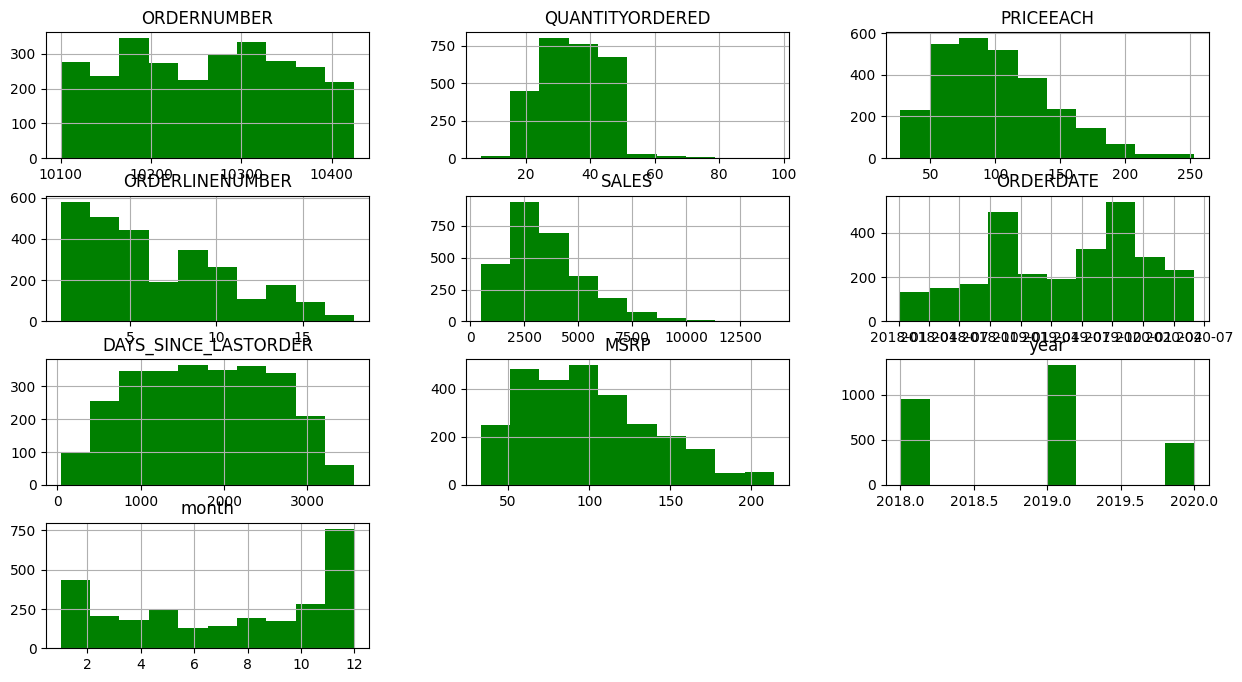

In [ ]:
df.hist(figsize=(15,8), color = 'g')

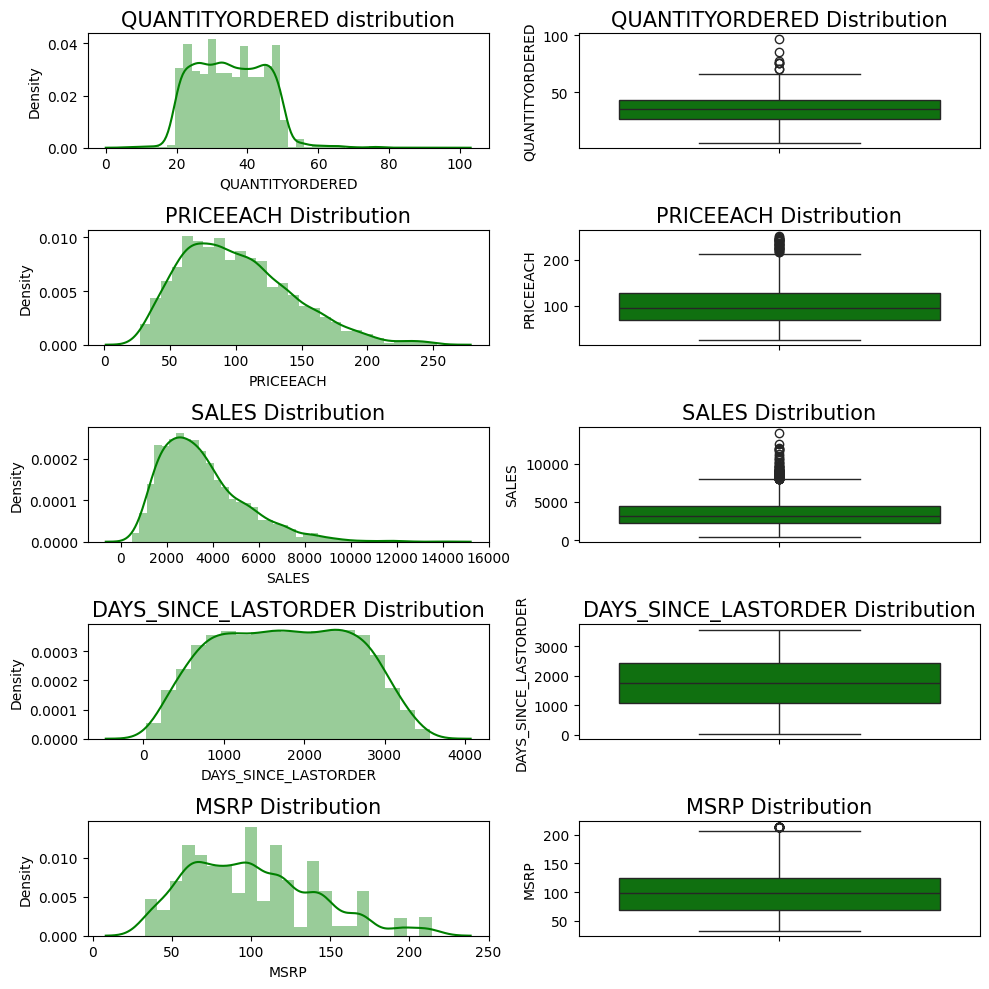

In [ ]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,10)

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0], color = 'g')
a.set_title("QUANTITYORDERED distribution",fontsize=15)

a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[0][1], color = 'g')
a.set_title("QUANTITYORDERED Distribution",fontsize=15)

a = sns.distplot(df['PRICEEACH'] , ax=axes[1][0], color = 'g')
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[1][1], color = 'g')
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.distplot(df['SALES'] , ax=axes[2][0], color = 'g')
a.set_title("SALES Distribution",fontsize=15)

a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[2][1], color = 'g')
a.set_title("SALES Distribution",fontsize=15)


a = sns.distplot(df['DAYS_SINCE_LASTORDER'] , ax=axes[3][0], color = 'g')
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.boxplot(df['DAYS_SINCE_LASTORDER'] , orient = "v" , ax=axes[3][1], color = 'g')
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.distplot(df['MSRP'] , ax=axes[4][0], color = 'g')
a.set_title("MSRP Distribution",fontsize=15)

a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[4][1], color = 'g')
a.set_title("MSRP Distribution",fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate correlation only on numerical columns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
# Calculate correlation on numerical columns
df[numerical_cols].corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,year,month
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910,0.903582,-0.028515
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551,0.070520,-0.037926
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393,-0.012493,0.017535
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956,-0.055058,0.029180
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849,0.033604,-0.010200
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285,-0.224787,-0.011207
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000,-0.016434,0.005306
year,0.903582,0.070520,-0.012493,-0.055058,0.033604,-0.224787,-0.016434,1.000000,-0.421548
month,-0.028515,-0.037926,0.017535,0.029180,-0.010200,-0.011207,0.005306,-0.421548,1.000000


<Axes: >

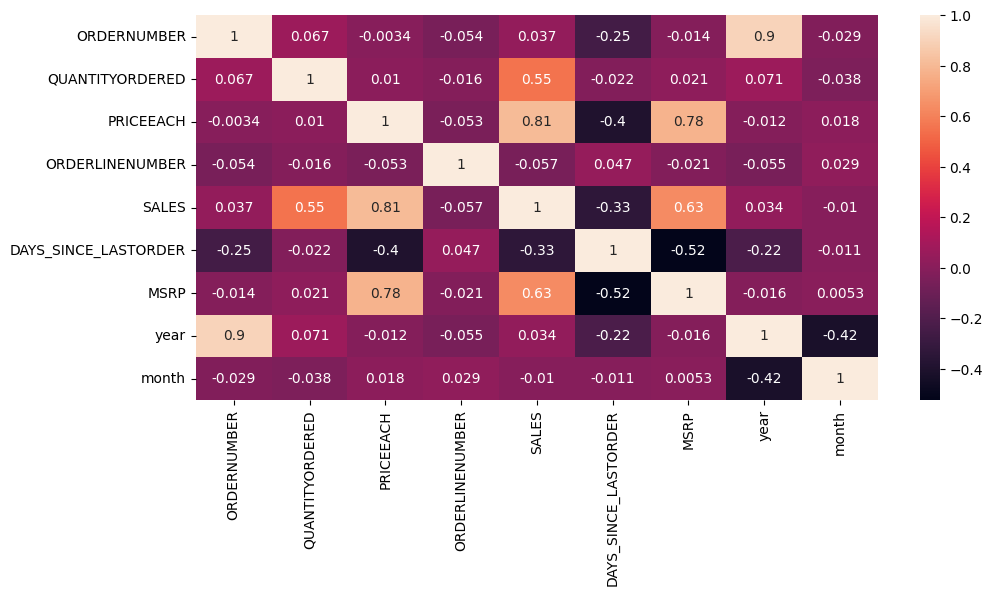

In [32]:
# Calculate correlation only on numerical columns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
# Calculate correlation on numerical columns
correlation_matrix = df[numerical_cols].corr() # Store the correlation matrix in a variable

plt.subplots(figsize=(11,5))
sns.heatmap(correlation_matrix,annot = True) # Use the correlation matrix of numerical columns for the heatmap

<Axes: >

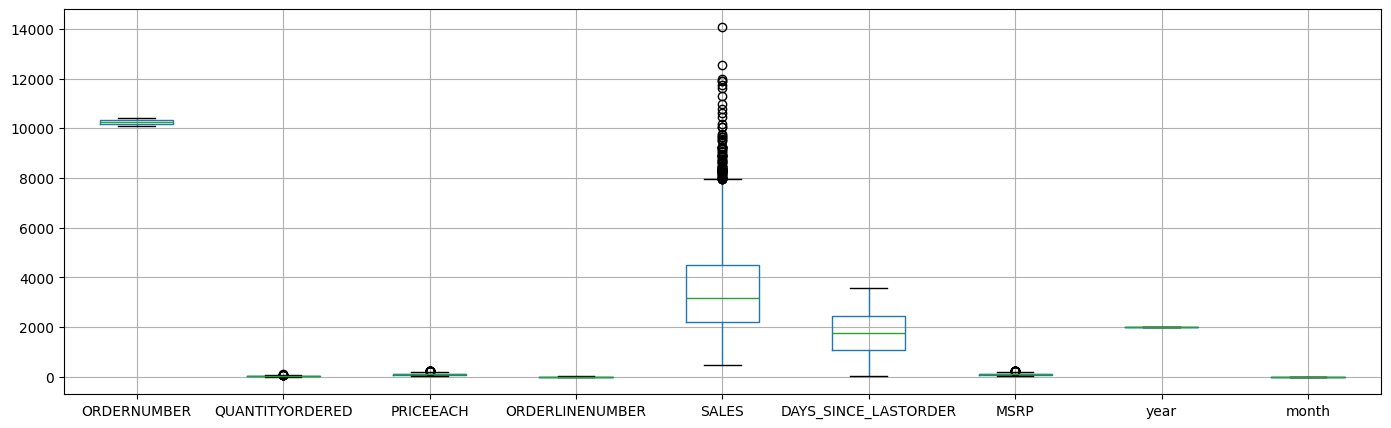

In [34]:
df.boxplot(figsize=(17,5))

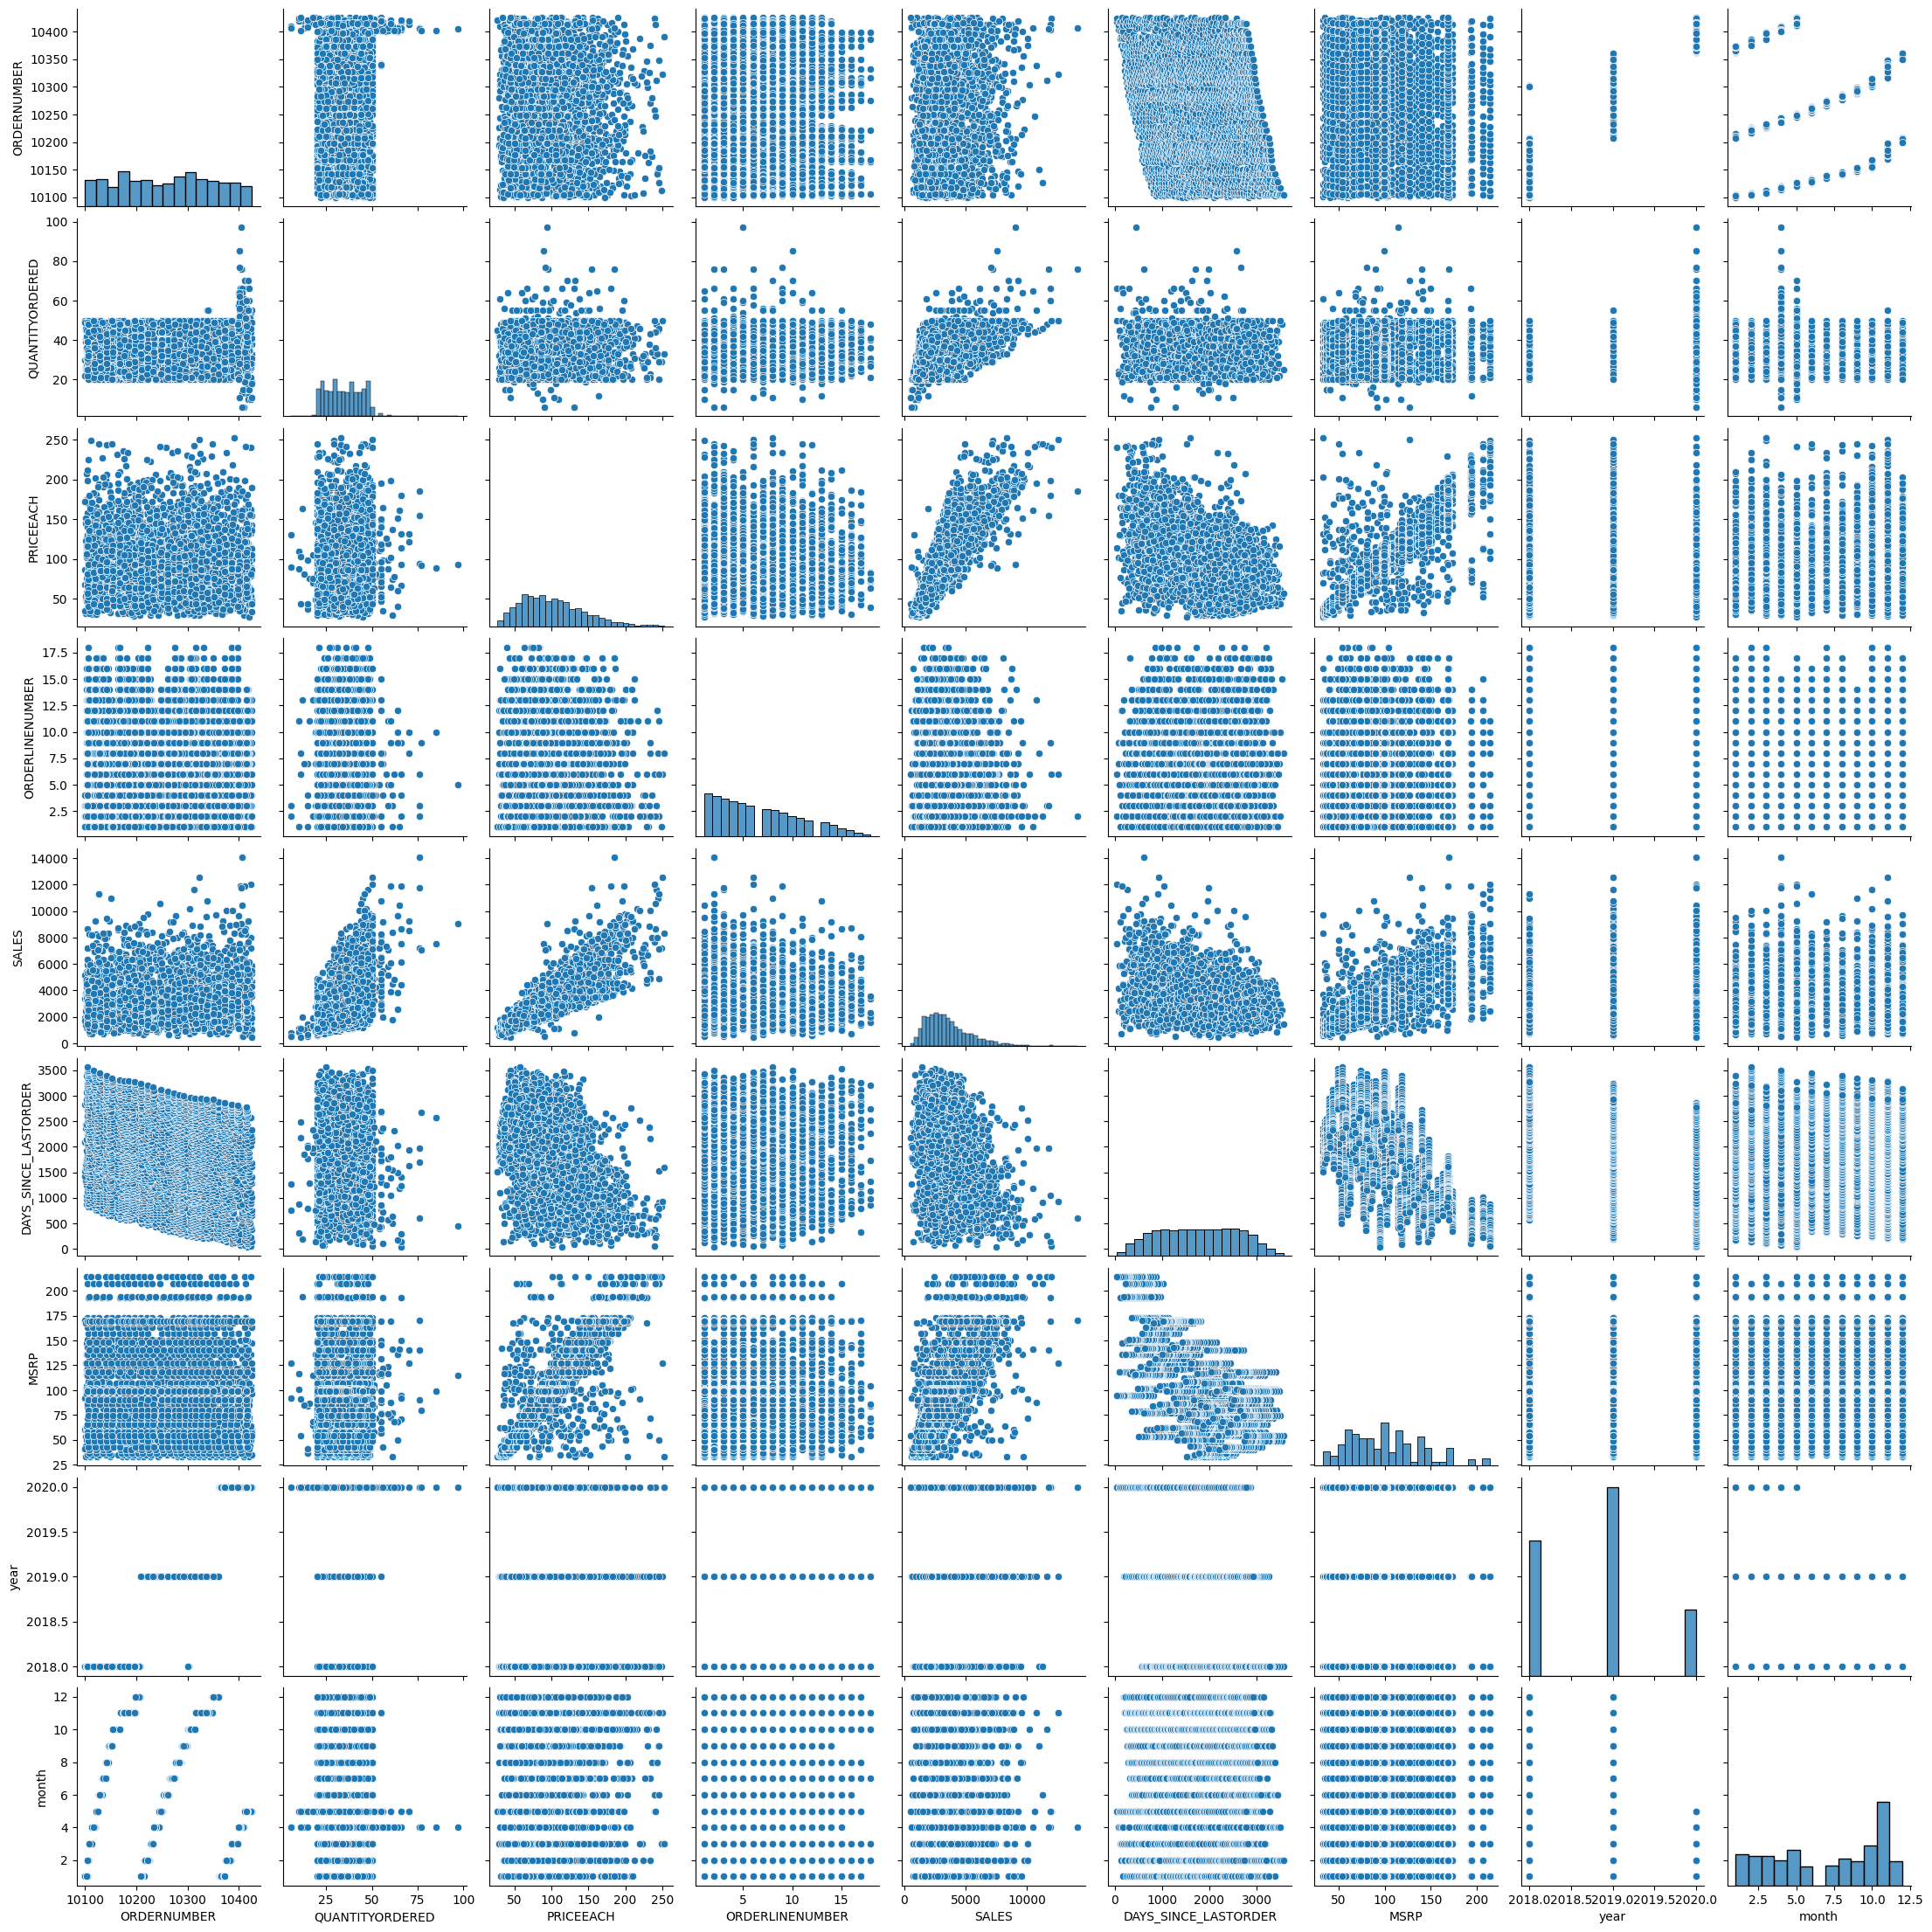

In [ ]:
sns.pairplot(df)
fig.set_size_inches(12, 7)

In [ ]:
df1=df.copy()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lratio,uratio=remove_outlier(df1['QUANTITYORDERED'])
df1['QUANTITYORDERED']=np.where(df1['QUANTITYORDERED']>uratio,uratio,df1['QUANTITYORDERED'])
df1['QUANTITYORDERED']=np.where(df1['QUANTITYORDERED']<lratio,lratio,df1['QUANTITYORDERED'])

lraxis,uraxis=remove_outlier(df1['PRICEEACH'])
df1['PRICEEACH']=np.where(df1['PRICEEACH']>uraxis,uraxis,df1['PRICEEACH'])
df1['PRICEEACH']=np.where(df1['PRICEEACH']<lraxis,lraxis,df1['PRICEEACH'])

lra,ura=remove_outlier(df1['SALES'])
df1['SALES']=np.where(df1['SALES']>ura,ura,df1['SALES'])
df1['SALES']=np.where(df1['SALES']<lra,lra,df1['SALES'])

lrs,urs=remove_outlier(df1['MSRP'])
df1['MSRP']=np.where(df1['MSRP']>urs,urs,df1['MSRP'])
df1['MSRP']=np.where(df1['MSRP']<lrs,lrs,df1['MSRP'])

<Axes: >

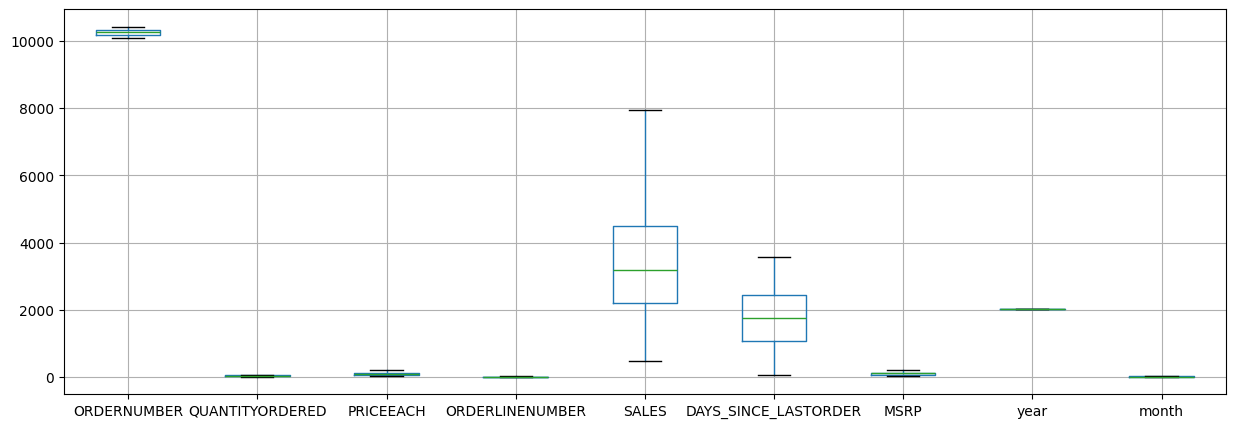

In [ ]:
df1.boxplot(figsize=(15,5))

In [ ]:
# Calculate correlation only on numerical columns
# Identify numerical columns
numerical_cols = df1.select_dtypes(include=np.number).columns
# Calculate correlation on numerical columns
df1[numerical_cols].corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,year,month
ORDERNUMBER,1.000000,0.062640,-0.003321,-0.054300,0.028217,-0.251476,-0.013858,0.903582,-0.028515
QUANTITYORDERED,0.062640,1.000000,0.010018,-0.016372,0.550629,-0.021122,0.019799,0.065713,-0.035621
PRICEEACH,-0.003321,0.010018,1.000000,-0.051670,0.814267,-0.397263,0.781075,-0.012476,0.017180
ORDERLINENUMBER,-0.054300,-0.016372,-0.051670,1.000000,-0.055499,0.046615,-0.020874,-0.055058,0.029180
SALES,0.028217,0.550629,0.814267,-0.055499,1.000000,-0.336058,0.645122,0.023731,-0.006320
DAYS_SINCE_LASTORDER,-0.251476,-0.021122,-0.397263,0.046615,-0.336058,1.000000,-0.524044,-0.224787,-0.011207
MSRP,-0.013858,0.019799,0.781075,-0.020874,0.645122,-0.524044,1.000000,-0.016390,0.005284
year,0.903582,0.065713,-0.012476,-0.055058,0.023731,-0.224787,-0.016390,1.000000,-0.421548
month,-0.028515,-0.035621,0.017180,0.029180,-0.006320,-0.011207,0.005284,-0.421548,1.000000


In [ ]:
# Calculate skewness only on numerical columns
numerical_cols = df1.select_dtypes(include=np.number).columns
df1[numerical_cols].skew()

,0
ORDERNUMBER,-0.006995
QUANTITYORDERED,0.205485
PRICEEACH,0.591875
ORDERLINENUMBER,0.575327
SALES,0.784172
DAYS_SINCE_LASTORDER,-0.002983
MSRP,0.554170
year,0.255765
month,-0.262844


<Axes: >

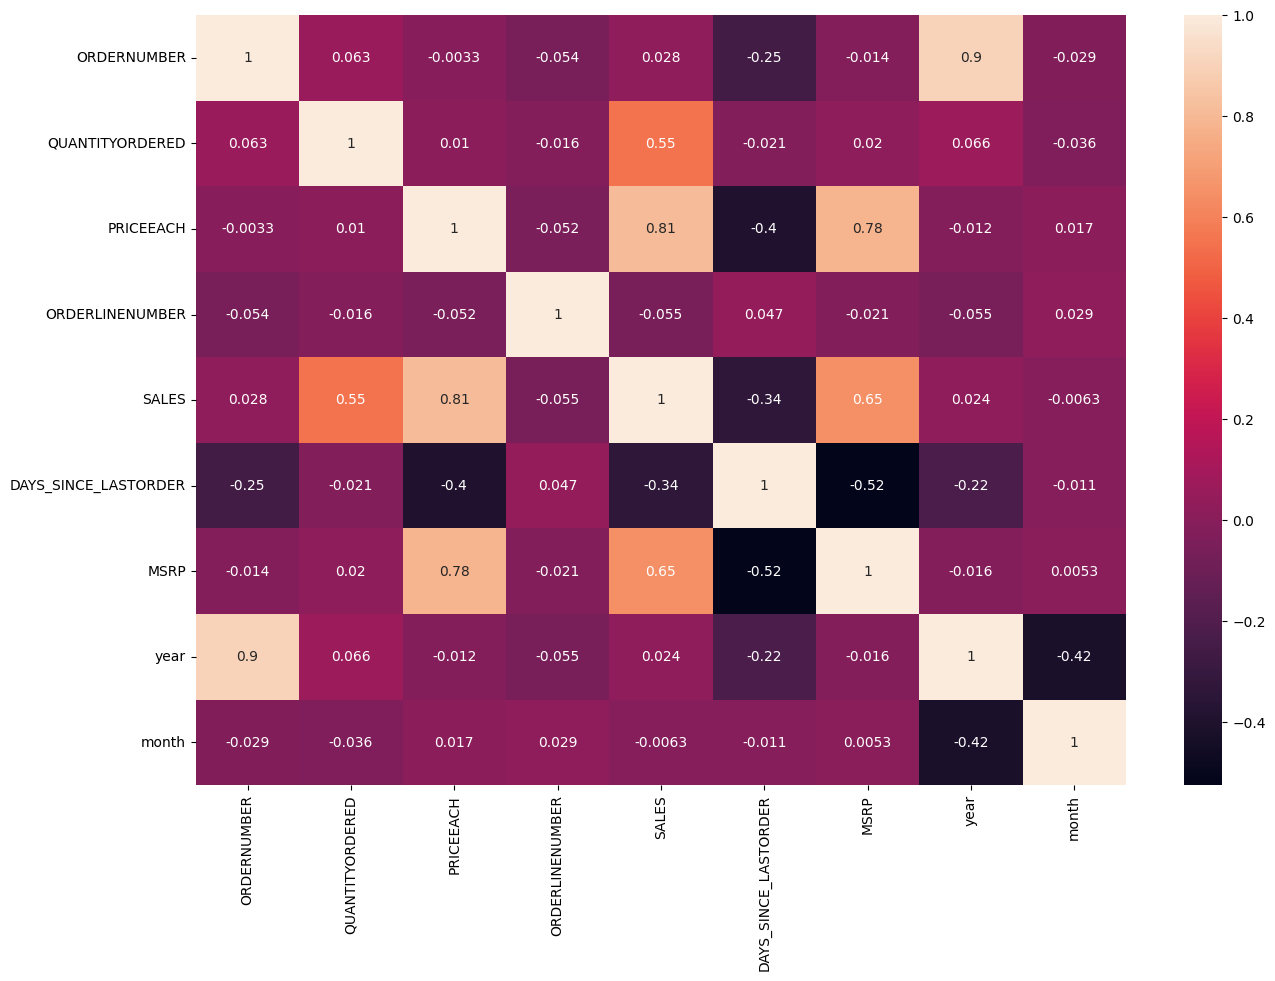

In [ ]:
plt.subplots(figsize=(15,10))
# Identify numerical columns and calculate correlation only on them
numerical_cols = df1.select_dtypes(include=np.number).columns
sns.heatmap(df1[numerical_cols].corr(),annot = True)

In [ ]:
MRA = pd.ExcelWriter('SalesData_FinalH.xlsx')
df1.to_excel(MRA, index = False)
# MRA.save() # This method is not available for OpenpyxlWriter in newer pandas versions
MRA.close() # Use close() instead of save()
# Alternatively, use a with statement:
# with pd.ExcelWriter('Sales_Data_Final.xlsx') as writer:
#     df1.to_excel(writer, index=False)